In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_jobs = pd.read_csv('mycareersfuturesg_results.csv')
print(df_jobs.head())

                             job_id        ext_job_id  \
0  45e55f0ecb5f53c92a628c9833d87352  MCF-2025-0339990   
1  c17276ce80cf2497ed57d25a47321788  MCF-2025-0339989   
2  71614e06028388f1ea52f07388b4ab62  MCF-2025-0339988   
3  9b8ad48366be23d51fbccf3046274af3  MCF-2025-0339986   
4  e71154fbce15aea25832fbfc2ac5f6c2  MCF-2025-0339984   

                                           job_title  \
0                               Senior / Staff Nurse   
1                 Senior Executive (Donor Relations)   
2                            Architectural Associate   
3                                 HR & Admin Manager   
4  Premium Student Care Teaching Assistant (Part ...   

   minimum_years_experience  ssoc_code  \
0                         3      22200   
1                         2      33492   
2                         3      21610   
3                         5      12199   
4                         0      53120   

                                          categories     employment

#Visualizations for Job Market Demand

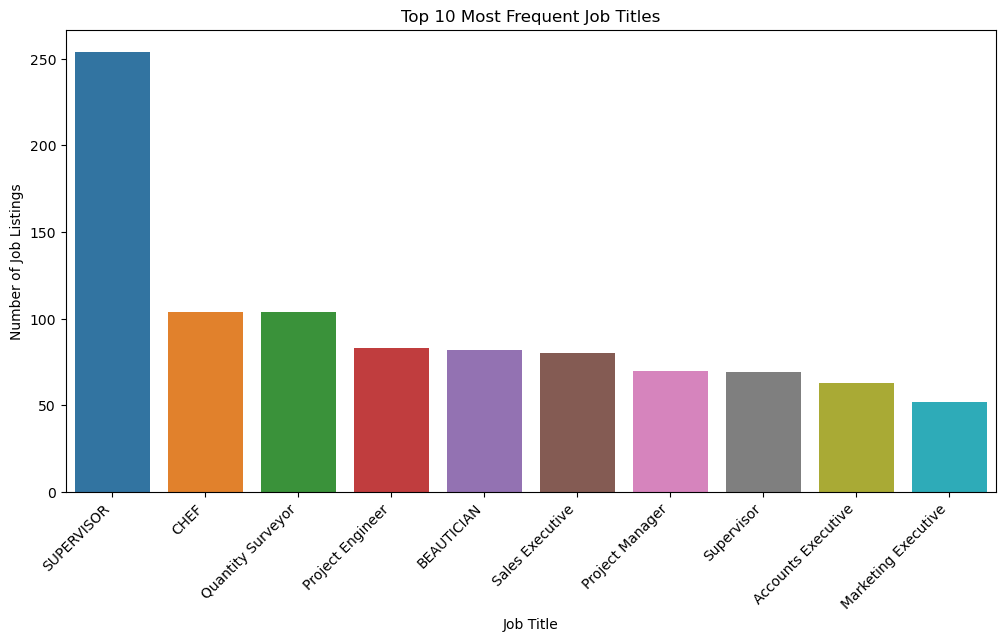

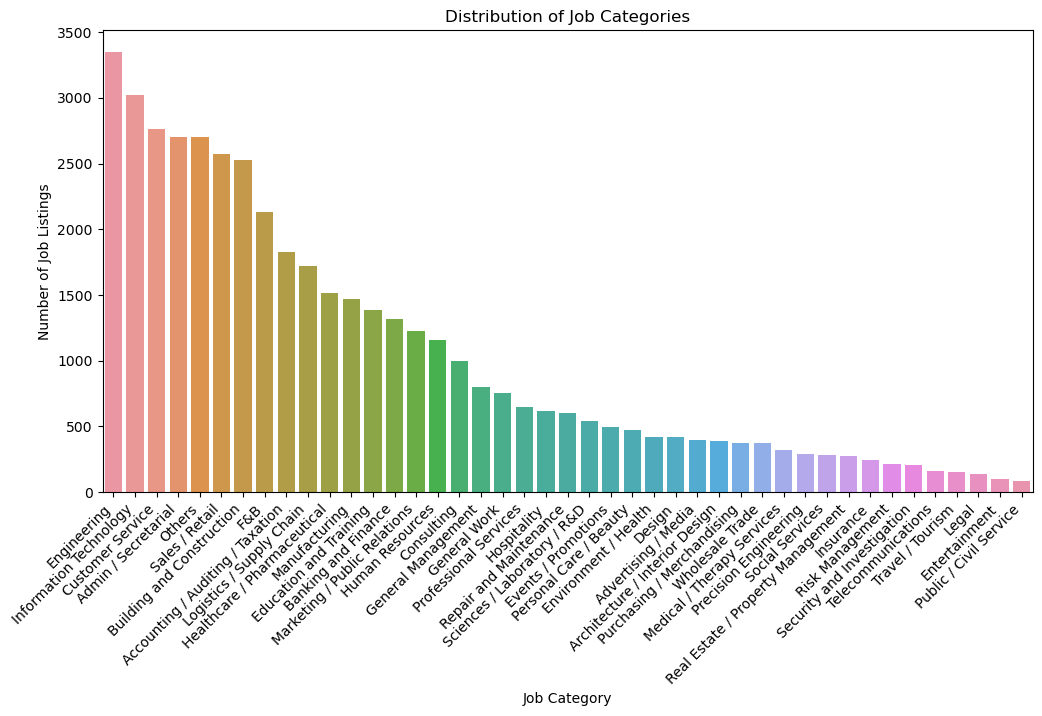

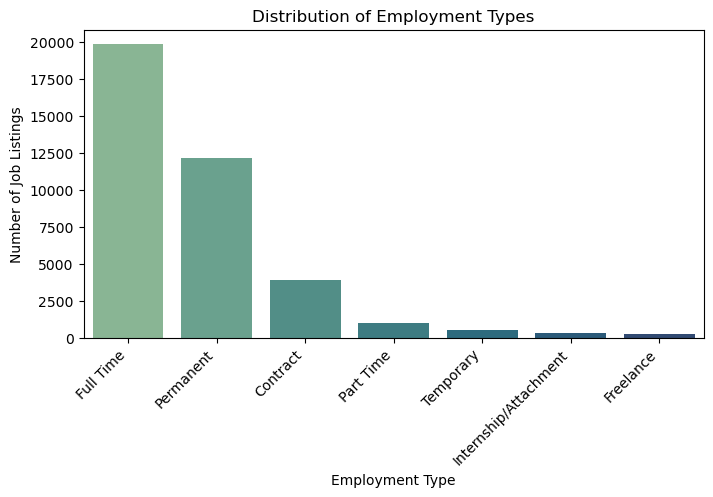

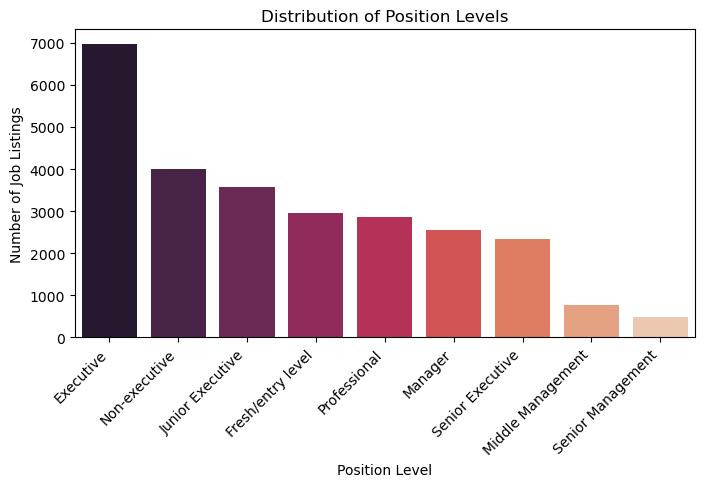

In [5]:


# --- If categories, employment_types, position_levels are already simple ; strings in CSV, you can do this:
df_jobs['category_names'] = df_jobs['categories'].str.split('; ') #  ; and space separator
df_jobs['employment_type_names'] = df_jobs['employment_types'].str.split('; ')
df_jobs['position_level_names'] = df_jobs['position_levels'].str.split('; ')


# Explode lists to count individual categories, types, levels
df_categories_exploded = df_jobs.explode('category_names')
df_employment_types_exploded = df_jobs.explode('employment_type_names')
df_position_levels_exploded = df_jobs.explode('position_level_names')


# --- Visualization Code for Job Market Demand & Popularity Trends ---

# --- 1 Bar Chart of Top Job Titles ---
job_title_counts = df_jobs['job_title'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.index, y=job_title_counts.values)
plt.xlabel('Job Title')
plt.ylabel('Number of Job Listings')
plt.title('Top 10 Most Frequent Job Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- 2 Bar Chart of Job Categories ---
category_counts = df_categories_exploded['category_names'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Job Category')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Job Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- 3 Bar Chart of Employment Types ---
employment_type_counts = df_employment_types_exploded['employment_type_names'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, palette="crest")
plt.xlabel('Employment Type')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Employment Types')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- 3.4 Bar Chart of Position Levels ---
position_level_counts = df_position_levels_exploded['position_level_names'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=position_level_counts.index, y=position_level_counts.values, palette="rocket")
plt.xlabel('Position Level')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Position Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

/Users/laksh/miniconda3/envs/pds/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


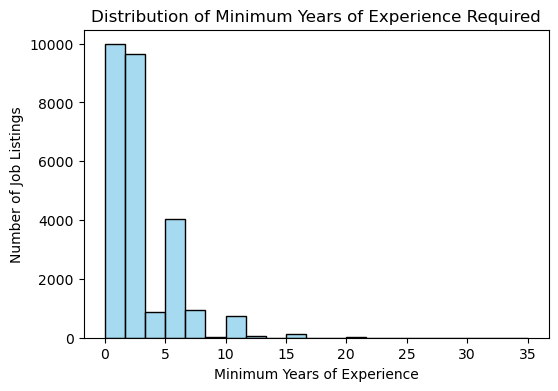

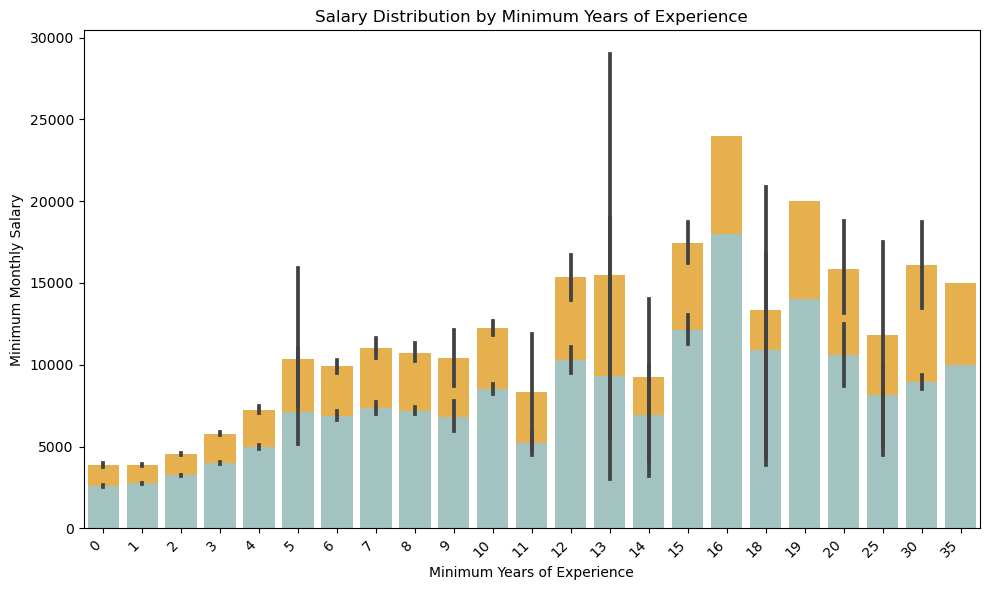

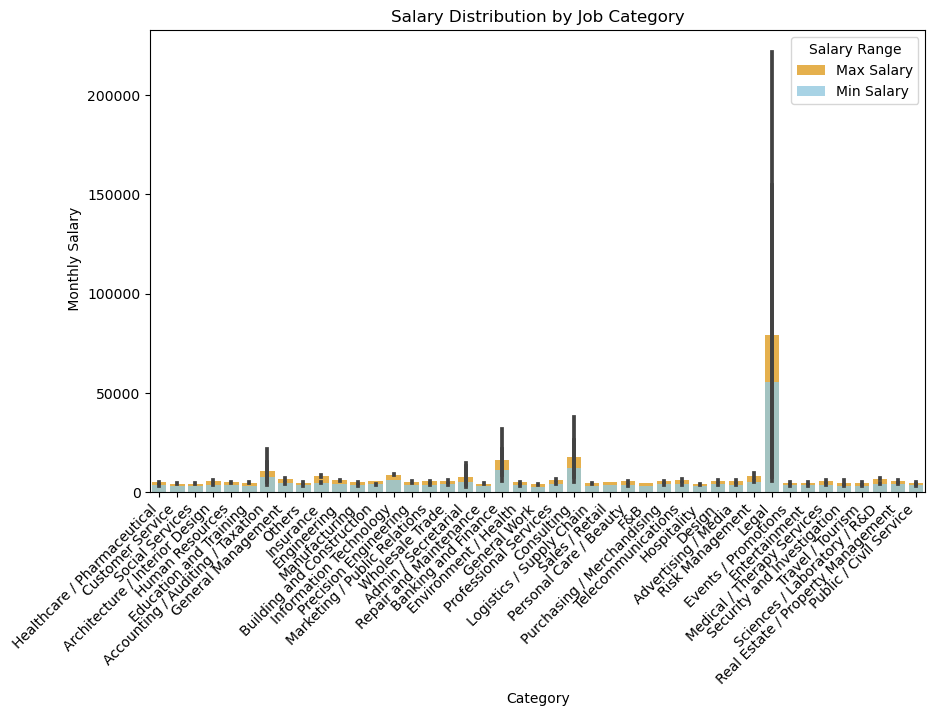

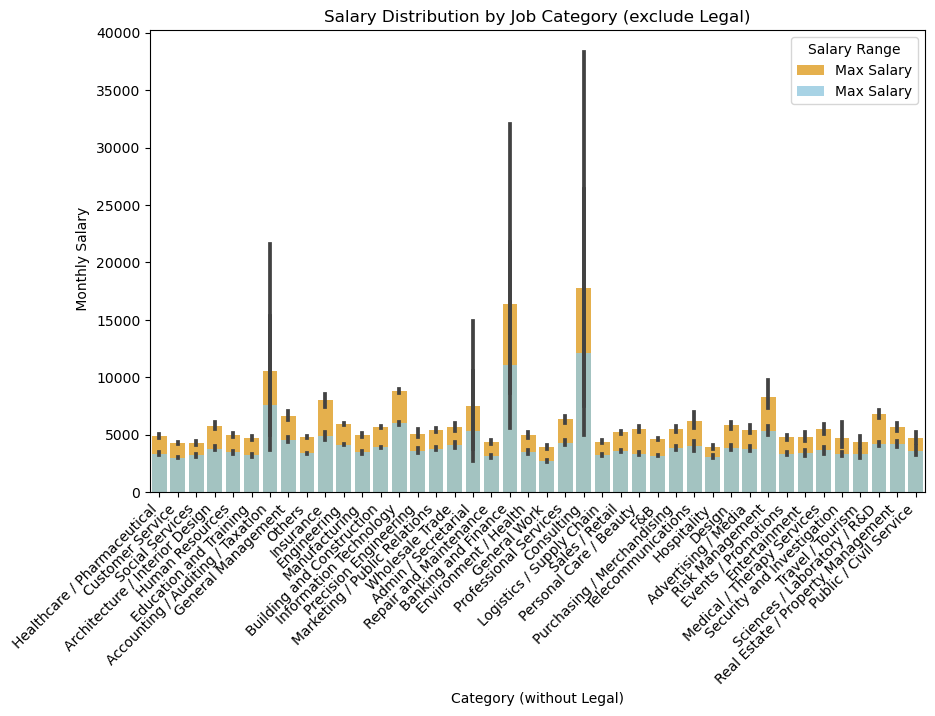

In [6]:
# --- Histogram of Minimum Years of Experience ---
plt.figure(figsize=(6, 4))
sns.histplot(df_jobs['minimum_years_experience'], kde=False, bins=21, color='skyblue')

plt.xlabel('Minimum Years of Experience')
plt.ylabel('Number of Job Listings')
plt.title('Distribution of Minimum Years of Experience Required')
plt.show()

# --- Box Plot of Salary vs. Minimum Experience  ---
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_years_experience', y='salary_maximum', data=df_jobs, color="orange", alpha=0.8, label='Max Salary')
sns.barplot(x='minimum_years_experience', y='salary_minimum', data=df_jobs, color="skyblue", alpha=0.8,  label="Min Salary")

plt.xlabel('Minimum Years of Experience')
plt.ylabel('Minimum Monthly Salary')
plt.title('Salary Distribution by Minimum Years of Experience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- bar Plot of Salary vs. Category ---
plt.figure(figsize=(10, 6))

sns.barplot(x='category_names', y='salary_maximum', data=df_categories_exploded, color="orange", alpha=0.8, label='Max Salary')
sns.barplot(x='category_names', y='salary_minimum', data=df_categories_exploded, color="skyblue", alpha=0.8, label="Min Salary")

plt.xlabel('Category')
plt.ylabel(' Monthly Salary')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Salary Range")
plt.show()

df_wo_legal = df_categories_exploded[df_categories_exploded['category_names'] != 'Legal']
plt.figure(figsize=(10, 6))
sns.barplot(x='category_names', y='salary_maximum', data=df_wo_legal, color="orange", alpha=0.8, label='Max Salary')
sns.barplot(x='category_names', y='salary_minimum', data=df_wo_legal, color="skyblue", alpha=0.8, label='Max Salary')
plt.xlabel('Category (without Legal)')
plt.ylabel(' Monthly Salary')
plt.title('Salary Distribution by Job Category (exclude Legal)')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Salary Range")
plt.show()
